# Information Section:

Team Member Names: Nowshin Binte Jamal, Md Azad Hossain Raju, Touhid Imam

Course Name: CSC 761-UT1 - Advanced Artificial Intelligence - Spring 2024

Project: SBA Loan Approval Decision With Machine Learning


# Introduction

This project aims to transform the Small Business Administration (SBA)'s loan approval process through the adoption of a machine learning system, focusing specifically on data from California from the years 1991 to 2009. By shifting from manual methods to a data-driven approach, we aim to significantly enhance the accuracy and efficiency of decisions, reduce risks, and ensure greater transparency in the loan distribution process. Utilizing advanced machine learning techniques such as logistic regression, random forest, decision trees, and ensemble methods, we will develop a predictive model that evaluates loan eligibility based on essential criteria like industry type, revenue, and location. Our objective is to deliver a tool that not only expedites the approval process but also makes it fairer, thereby boosting the SBA’s capability to effectively support small businesses.

# Libraries:

We have imported the necessary libraries for our project from pandas, numpy, scikit learn, matplotlib and seaborn.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve
from sklearn.ensemble import VotingClassifier



# Data Collection:
We have taken our data from a comprehensive dataset provided by the Small Business Administration (SBA) official website, titled "FOIA - 504 (FY1991-FY2009) as of 23/12/31.csv". This file is a product of the Freedom of Information Act (FOIA), making it publicly available for research and analysis purposes.

Data Source:
https://data.sba.gov/dataset/7-a-504-foia

In [42]:
# Loading the dataset
data = pd.read_csv('/content/foia-504-fy1991-fy2009-asof-231231.csv')

<ipython-input-42-361842ce4fcf>:2: DtypeWarning: Columns (12,13,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/foia-504-fy1991-fy2009-asof-231231.csv')


focusing on loans in California. Initial steps involved loading the data, handling data types warnings, and filtering records specific to California.

In [43]:
# Filtering data for loans in California based on 'BorrState'
data_ca = data[data['BorrState'] == 'CA']
data_ca. head()

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,CDC_Name,CDC_Street,CDC_City,...,ProjectState,SBADistrictOffice,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,JobsSupported
25,20231231,504,BAY AREA DRILLING,"549 GARCIA AVENUE, LOTS 6,7",PITTSBURG,CA,94565,Bay Area Employment Developmen,1801 Oakland Boulevard,Walnut Creek,...,CA,SAN FRANCISCO DISTRICT OFFICE,11.0,INDIVIDUAL,NaN,PIF,05/31/2005,NaN,0,16
34,20231231,504,EL POLLO LOCO,1001 WEST ARROW HWY,SAN DIMAS,CA,91773,Landmark Certified Development,441 East Whittier Boulevard,La Habra,...,CA,LOS ANGELES DISTRICT OFFICE,27.0,CORPORATION,NaN,CANCLD,NaN,NaN,0,32
72,20231231,504,"THE CITADEL PRESS, INC.",3300 BUSINESS DRIVE,SACRAMENTO,CA,95820,SBA - EDF Enforcement Action,SBA Denver Finance Center,Denver,...,CA,SACRAMENTO DISTRICT OFFICE,6.0,CORPORATION,NaN,PIF,05/31/2005,NaN,0,45
73,20231231,504,"CYNTHIA L CURRY, ATTY AT LAW",1301 L ST.,BAKERSFIELD,CA,93301,Mid State Development Corporat,1631 17th Street,Bakersfield,...,CA,FRESNO DISTRICT OFFICE,23.0,INDIVIDUAL,NaN,CHGOFF,NaN,04/17/1995,75262,2
75,20231231,504,DE MAR PLUMBING HEATING & A/C,1705 FINCHWOOD,CLOVIS,CA,93612,Cen Cal Business Finance Group,5094 N. Fruit Avenue,Fresno,...,CA,FRESNO DISTRICT OFFICE,22.0,CORPORATION,NaN,CHGOFF,NaN,07/23/1996,79160,6


# Data Cleaning, Preprocessing and Feature Engineering:

Our approach to data preparation and feature engineering. Here’s a concise summary of the key steps and strategies you've implemented:

Dropping Features: You've pruned irrelevant or empty features to focus on crucial variables like 'LoanStatus', 'GrossApproval', and others that directly influence loan approval outcomes.

Removing Unreliable Rows: Entries with ambiguous 'LoanStatus' values such as 'NaN', 'EXEMPT', or 'CANCELED' were removed to reduce noise and improve model accuracy.

Handling Missing Values: Missing data were addressed by filling gaps with the mode of each column, maintaining the original data distribution and avoiding potential biases from other imputation methods.

Verification of Data Completeness: You conducted a thorough check to ensure no missing values remained, confirming the dataset's readiness for further analysis.

Feature Engineering:

   Simplifying NAICS Codes: You condensed 'NaicsCode' and 'NaicsDescription' into a broader 'NaicsSector' category by extracting the first two digits, simplifying the dataset and aiding generalization.

   Frequency Encoding of Cities: 'BorrCity' was encoded based on the frequency of occurrence, which maintains the influence of geographic distribution without expanding the feature space.

   Binary Encoding of Loan Status: 'LoanStatus' was binary encoded with 'PIF' (paid in full) mapped to 1 and 'CHGOFF' (charged off) to 0, optimizing it for classification models.


Handling Outliers:

   Visualization and Detection: You used box plots to identify outliers in numerical features, helping to spot significant deviations in the data.

   Winsorization: Numerical columns were winsorized at the 1st and 99th percentiles, limiting the impact of extreme values on the model's performance while retaining most data.

In [44]:
# Selecting relevant columns
columns_of_interest = [
    'LoanStatus', 'GrossApproval', 'ApprovalFiscalYear', 'TermInMonths',
    'BorrCity', 'NaicsCode', 'NaicsDescription', 'JobsSupported', 'BusinessType'
]
# Create a new DataFrame with only the selected columns
data_ca_selected = data_ca[columns_of_interest]
# Display the first few rows of the new DataFrame to ensure it looks correct
data_ca_selected.head()

,LoanStatus,GrossApproval,ApprovalFiscalYear,TermInMonths,BorrCity,NaicsCode,NaicsDescription,JobsSupported,BusinessType
25,PIF,190000.0,1991,240,PITTSBURG,235930.0,Excavation Contractors,16,INDIVIDUAL
34,CANCLD,234000.0,1991,240,SAN DIMAS,NaN,NaN,32,CORPORATION
72,PIF,466000.0,1991,240,SACRAMENTO,511120.0,Periodical Publishers,45,CORPORATION
73,CHGOFF,78000.0,1991,240,BAKERSFIELD,541110.0,Offices of Lawyers,2,INDIVIDUAL
75,CHGOFF,157000.0,1991,240,CLOVIS,235110.0,"Plumbing, Heating, and Air Conditioning Contra...",6,CORPORATION



Removing the unnecessary rows across the dataset where the loan status is null or EXEMPT cause this will add complications in our model

In [45]:
# Remove entries where 'LoanStatus' is NaN, 'EXEMPT', or 'CANCLED'
data_ca_selected = data_ca_selected.dropna(subset=['LoanStatus'])
data_ca_selected = data_ca_selected[~data_ca_selected['LoanStatus'].isin(['EXEMPT', 'CANCLD'])]


# Displaying the shape of the dataset to confirm changes and show a few rows to verify
data_ca_selected.head()

,LoanStatus,GrossApproval,ApprovalFiscalYear,TermInMonths,BorrCity,NaicsCode,NaicsDescription,JobsSupported,BusinessType
25,PIF,190000.0,1991,240,PITTSBURG,235930.0,Excavation Contractors,16,INDIVIDUAL
72,PIF,466000.0,1991,240,SACRAMENTO,511120.0,Periodical Publishers,45,CORPORATION
73,CHGOFF,78000.0,1991,240,BAKERSFIELD,541110.0,Offices of Lawyers,2,INDIVIDUAL
75,CHGOFF,157000.0,1991,240,CLOVIS,235110.0,"Plumbing, Heating, and Air Conditioning Contra...",6,CORPORATION
76,PIF,392000.0,1991,240,SACRAMENTO,624410.0,Child Day Care Services,18,INDIVIDUAL


In [46]:
# Identifying columns with missing values and calculate mode
missing_value_columns = data_ca_selected.columns[data_ca_selected.isnull().any()].tolist()
modes = data_ca_selected[missing_value_columns].mode().iloc[0]

In [47]:
# Filling missing values with the mode
data_ca_selected.fillna(modes, inplace=True)

# Checking if there are any remaining missing values
data_ca_remaining_missing = data_ca_selected.isnull().sum()
data_ca_remaining_missing

LoanStatus            0
GrossApproval         0
ApprovalFiscalYear    0
TermInMonths          0
BorrCity              0
NaicsCode             0
NaicsDescription      0
JobsSupported         0
BusinessType          0
dtype: int64

Converting naics code and naics description into naics sector to reduce features.

In [48]:
# Applying transformation to NaicsCode to extract the first two digits and map to sector names
data_ca_selected['NaicsGroup'] = data_ca_selected['NaicsCode'].apply(lambda x: str(int(x))[:2])

# Updating the NAICS sector mapping to include all relevant sectors
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',  # Note: Includes '31', '32', and '33'
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',   # Note: Includes '44' and '45'
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',  # Note: Includes '48' and '49'
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

# Map the NAICS group codes to sector names using the extended mapping
data_ca_selected['NaicsSector'] = data_ca_selected['NaicsGroup'].map(naics_mapping)

# Displaying the updated data to check the correct application of the NAICS sector names
updated_naics_data = data_ca_selected[['NaicsCode', 'NaicsGroup', 'NaicsSector']].head()
updated_naics_data


,NaicsCode,NaicsGroup,NaicsSector
25,235930.0,23,Construction
72,511120.0,51,Information
73,541110.0,54,"Professional, Scientific, and Technical Services"
75,235110.0,23,Construction
76,624410.0,62,Health Care and Social Assistance


In [49]:
# dropping naicscode naicsdescription and naicsgroup
data_ca_selected = data_ca_selected.drop(['NaicsCode', 'NaicsDescription', 'NaicsGroup'], axis=1)

Encoded Borrow city using Frequency Encoding

In [50]:
# Applying frequency encoding to 'BorrCity'
city_freq = data_ca_selected['BorrCity'].value_counts().to_dict()
data_ca_selected['BorrCity'] = data_ca_selected['BorrCity'].map(city_freq)

# Displaying the transformed data to verify the encoding
encoded_cities = data_ca_selected[['BorrCity']].head()
encoded_cities

,BorrCity
25,25
72,565
73,324
75,29
76,565


In [51]:
# Defining the binary encoding for 'LoanStatus'
loan_status_mapping = {
    'PIF': 1,     # Positive outcome
    'CHGOFF': 0   # Negative outcome
}

# Applying the mapping to the 'LoanStatus' column
data_ca_selected['LoanStatus'] = data_ca_selected['LoanStatus'].map(loan_status_mapping)

# Displaying the transformed data to verify the binary encoding
binary_encoded_loan_status = data_ca_selected[['LoanStatus']].head()
binary_encoded_loan_status


,LoanStatus
25,1
72,1
73,0
75,0
76,1


# Outliers:

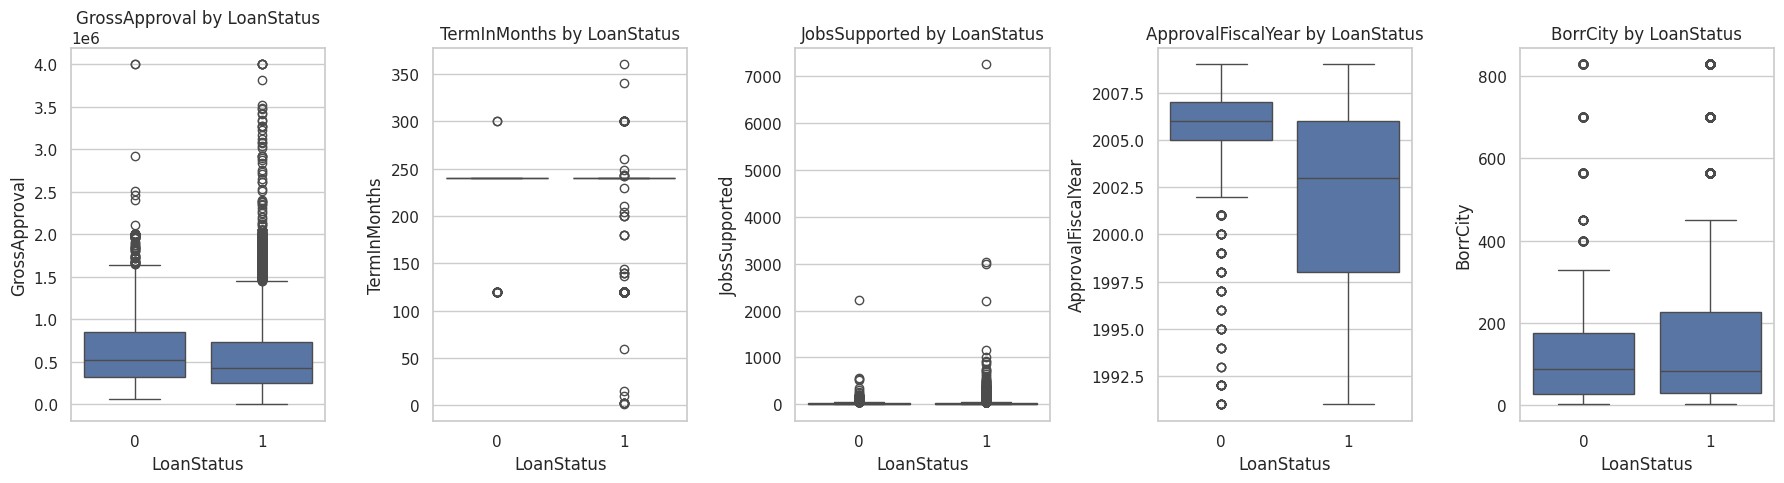

In [53]:
# Creating box plots for numerical features based on LoanStatus
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5))
sns.boxplot(x='LoanStatus', y='GrossApproval', data=data_ca_selected, ax=axes[0])
axes[0].set_title('GrossApproval by LoanStatus')
sns.boxplot(x='LoanStatus', y='TermInMonths', data=data_ca_selected, ax=axes[1])
axes[1].set_title('TermInMonths by LoanStatus')
sns.boxplot(x='LoanStatus', y='JobsSupported', data=data_ca_selected, ax=axes[2])
axes[2].set_title('JobsSupported by LoanStatus')
sns.boxplot(x='LoanStatus', y='ApprovalFiscalYear', data=data_ca_selected, ax=axes[3])
axes[3].set_title('ApprovalFiscalYear by LoanStatus')
sns.boxplot(x='LoanStatus', y='BorrCity', data=data_ca_selected, ax=axes[4])
axes[4].set_title('BorrCity by LoanStatus')

plt.tight_layout()
plt.show()

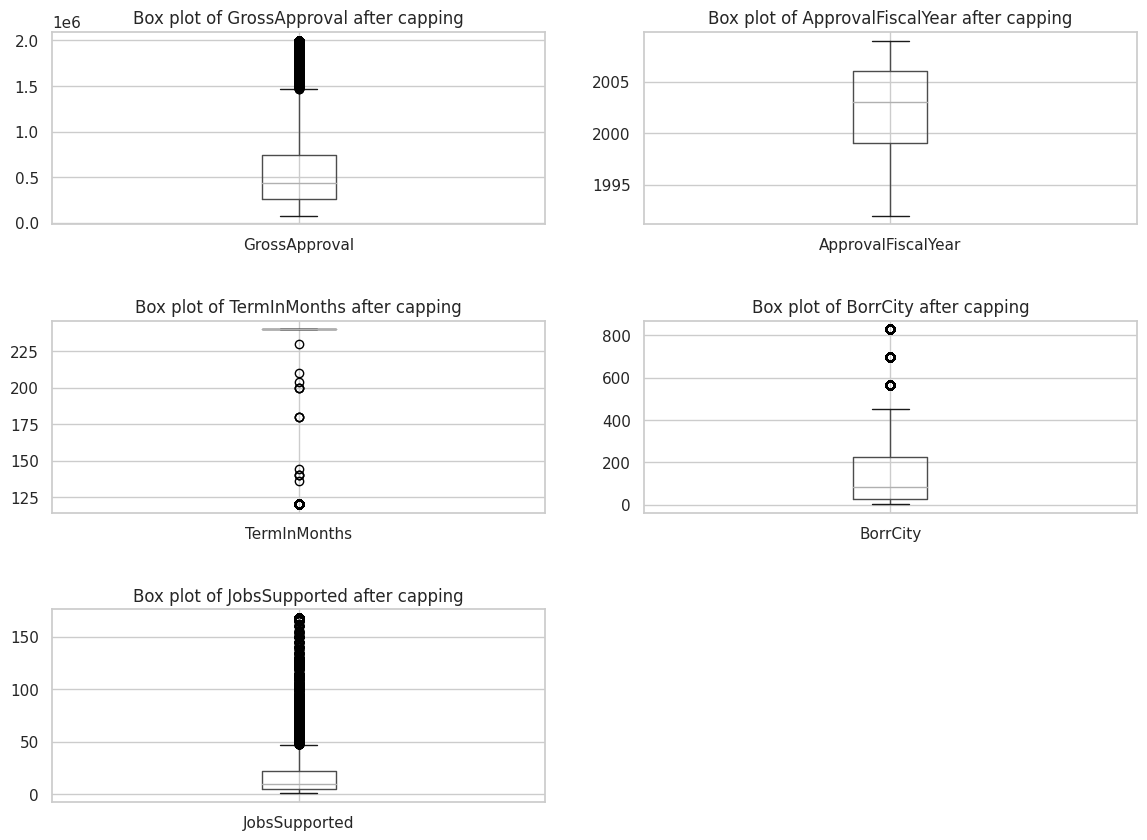

In [54]:
# Columns to cap
columns_to_cap = ['GrossApproval', 'ApprovalFiscalYear', 'TermInMonths',
       'BorrCity', 'JobsSupported']

# Applying winsorizing to the specified columns at the 1st and 99th percentiles
for column in columns_to_cap:
    data_ca_selected[column] = mstats.winsorize(data_ca_selected[column], limits=[0.01, 0.01])

# Checking results after capping
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.5)

for ax, column in zip(axes.flatten(), columns_to_cap):
    data_ca_selected.boxplot(column=column, ax=ax)
    ax.set_title(f'Box plot of {column} after capping')

# Hiding the last subplot (empty) since we have an extra subplot space
fig.delaxes(axes.flatten()[-1])

plt.show()


# EDA & Visualization:

1. Distribution Analysis: We examined the distribution of key features like 'GrossApproval' and 'TermInMonths' using histograms and density plots to understand their central tendencies and spreads.(Figure 04 and Figure 05 (Gross Approval & Job Approval))

2. Temporal and Categorical Exploration: Through bar charts and line plots, we explored categorical data (such as business types and NAICS sectors) and temporal trends (such as approval over the years), uncovering how distinct factors relate to loan outcomes.( Figure 06, Figure 07,and Figure 08(accross different sector, accross different years, Business Type))

3. Correlation Analysis: By calculating correlation matrices, we assessed how features are interrelated, which can influence the selection of variables for the model to avoid multicollinearity.( Figure 09 (Correlation Matrix))


Gross Approval over the year.

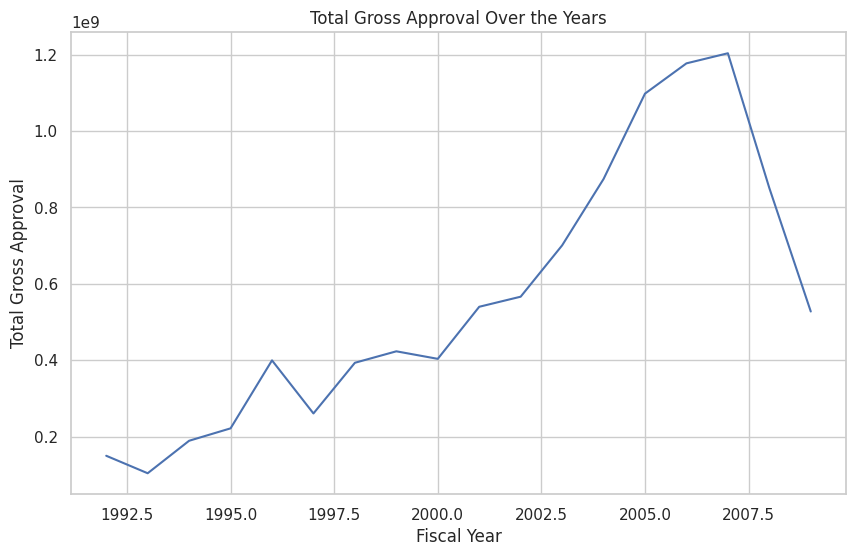

In [57]:
# Calculating yearly totals
yearly_totals = data_ca_selected.groupby('ApprovalFiscalYear')['GrossApproval'].sum()

# Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_totals.index, y=yearly_totals.values)
plt.title('Total Gross Approval Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Gross Approval')
plt.show()


Job Support over the year

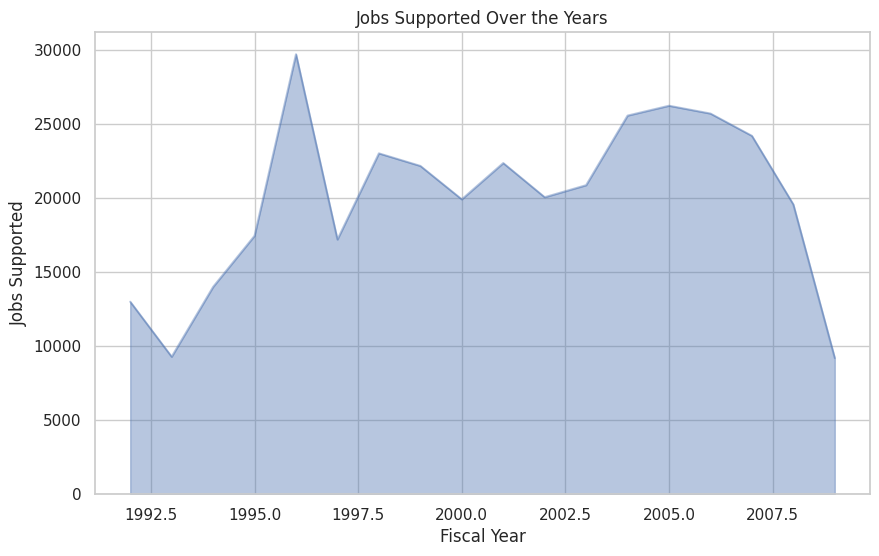

In [58]:
# Area Plot
jobs_yearly = data_ca_selected.groupby('ApprovalFiscalYear')['JobsSupported'].sum()
jobs_yearly.plot(kind='area', alpha=0.4, figsize=(10, 6))
plt.title('Jobs Supported Over the Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Jobs Supported')
plt.show()


In [59]:
# Pair Plot
#sns.pairplot(data_ca_selected[['GrossApproval', 'BorrCity', 'TermInMonths','ApprovalFiscalYear', 'JobsSupported', 'LoanStatus']], hue='LoanStatus')
#plt.show()


Loan by Naics Sector

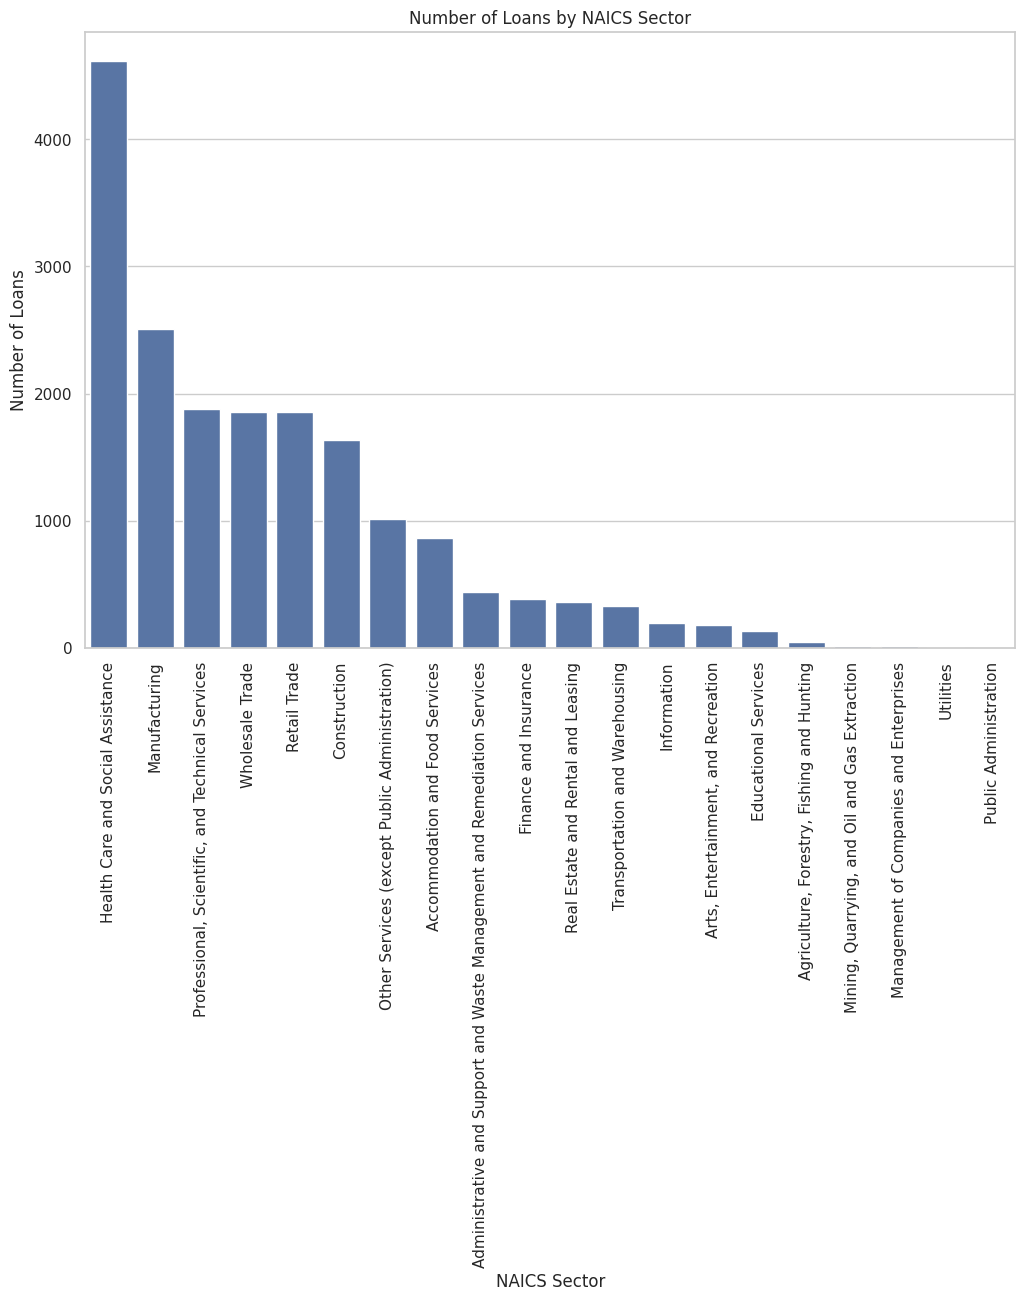

In [60]:
sns.set(style="whitegrid")

# Bar Plot
plt.figure(figsize=(12, 8))
sector_counts = data_ca_selected['NaicsSector'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Loans by NAICS Sector')
plt.ylabel('Number of Loans')
plt.xlabel('NAICS Sector')
plt.show()

Loan Distribution Accross Sectors

<ipython-input-61-72ec85652341>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

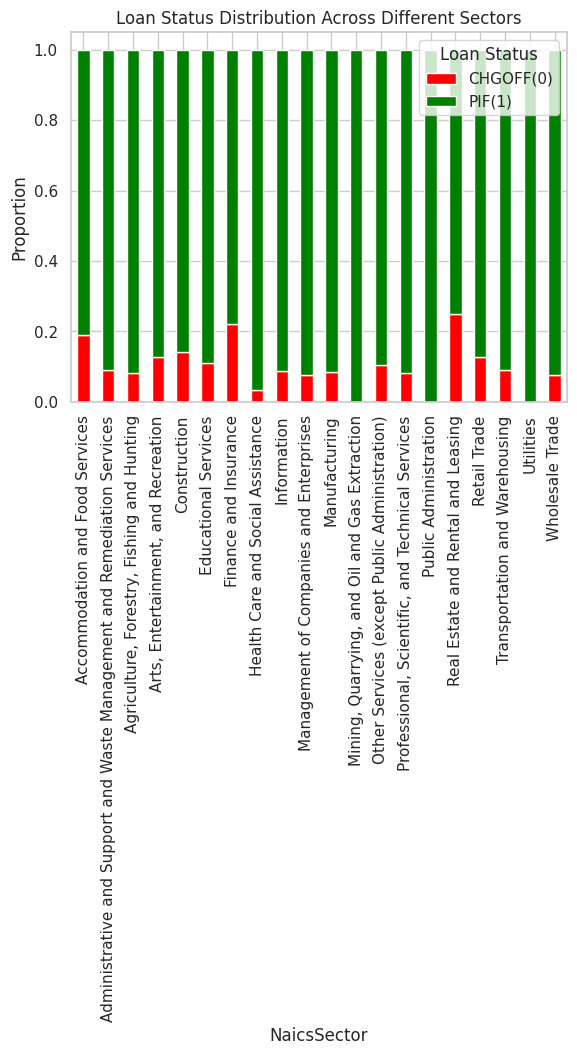

In [61]:
# Creating a dataframe to explore relationships between NaicsSector and LoanStatus
sector_loan_status = pd.crosstab(data_ca_selected['NaicsSector'], data_ca_selected['LoanStatus'])
sector_loan_status_normalized = sector_loan_status.div(sector_loan_status.sum(1), axis=0)

# Ploting the normalized crosstab of NaicsSector and LoanStatus
plt.figure(figsize=(12, 8))
sector_loan_status_normalized.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Loan Status Distribution Across Different Sectors')
plt.xlabel('NaicsSector')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', labels=['CHGOFF(0)', 'PIF(1)'])
plt.tight_layout()
plt.show()


Loan Distribution Accross Years

<Figure size 1200x800 with 0 Axes>

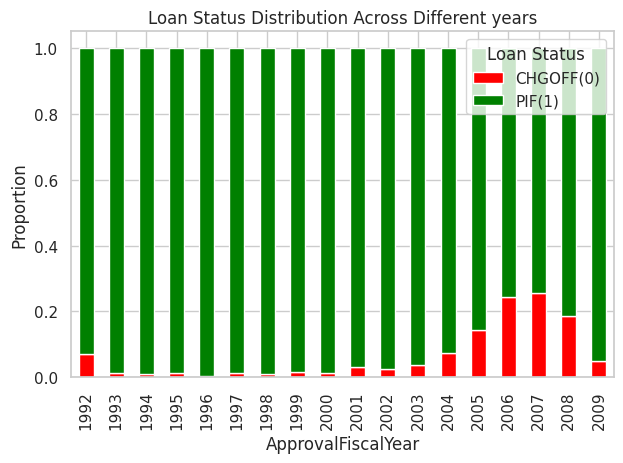

In [62]:
# Creating a dataframe to explore relationships between Years and LoanStatus
sector_loan_status = pd.crosstab(data_ca_selected['ApprovalFiscalYear'], data_ca_selected['LoanStatus'])
sector_loan_status_normalized = sector_loan_status.div(sector_loan_status.sum(1), axis=0)

# Ploting the normalized crosstab of Years and LoanStatus
plt.figure(figsize=(12, 8))
sector_loan_status_normalized.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Loan Status Distribution Across Different years')
plt.xlabel('ApprovalFiscalYear')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', labels=['CHGOFF(0)', 'PIF(1)'])
plt.tight_layout()
plt.show()


Loan Distribution Accross Business Types

<Figure size 1200x800 with 0 Axes>

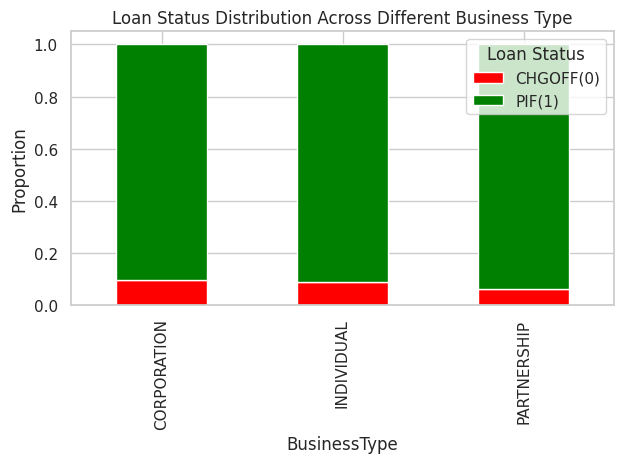

In [63]:
# Creating a dataframe to explore relationships between BusinessType and LoanStatus
sector_loan_status = pd.crosstab(data_ca_selected['BusinessType'], data_ca_selected['LoanStatus'])
sector_loan_status_normalized = sector_loan_status.div(sector_loan_status.sum(1), axis=0)

# Ploting the normalized crosstab of BusinessType and LoanStatus
plt.figure(figsize=(12, 8))
sector_loan_status_normalized.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Loan Status Distribution Across Different Business Type')
plt.xlabel('BusinessType')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', labels=['CHGOFF(0)', 'PIF(1)'])
plt.tight_layout()
plt.show()


Correletion matrix between the features:

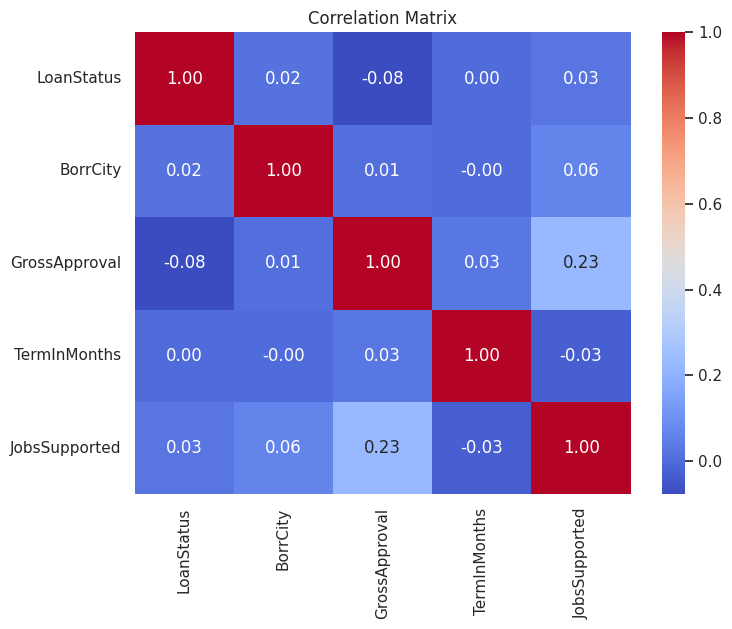

In [64]:
# Computing the correlation matrix including the target variable 'LoanStatus'
correlation_matrix = data_ca_selected[['LoanStatus','BorrCity', 'GrossApproval', 'TermInMonths', 'JobsSupported']].corr()

# Ploting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Final Preparations for Modeling

1. Encoding Categorical Values: We applied one-hot encoding to remaining categorical variables like 'NaicsSector' and 'BusinessType', transforming them into a binary format suitable for use in our models.

2. Standardizing Features: We standardized features like 'GrossApproval' and 'JobsSupported' using a StandardScaler, which normalizes the data, ensuring that features with larger scales do not dominate the model's learning process.


Encoding Categorical Values

In [65]:
# Applying one-hot encoding to the 'NaicsSector' column
data_encoded = pd.get_dummies(data_ca_selected, columns=['NaicsSector', 'BusinessType'])

# Displaying the first few rows of the newly encoded dataset
data_encoded.head()


,LoanStatus,GrossApproval,ApprovalFiscalYear,TermInMonths,BorrCity,JobsSupported,NaicsSector_Accommodation and Food Services,NaicsSector_Administrative and Support and Waste Management and Remediation Services,"NaicsSector_Agriculture, Forestry, Fishing and Hunting","NaicsSector_Arts, Entertainment, and Recreation",...,"NaicsSector_Professional, Scientific, and Technical Services",NaicsSector_Public Administration,NaicsSector_Real Estate and Rental and Leasing,NaicsSector_Retail Trade,NaicsSector_Transportation and Warehousing,NaicsSector_Utilities,NaicsSector_Wholesale Trade,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
25,1,190000.0,1992,240,25,16,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
72,1,466000.0,1992,240,565,45,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
73,0,79000.0,1992,240,324,2,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
75,0,157000.0,1992,240,29,6,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
76,1,392000.0,1992,240,565,18,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Standardizing the features:

In [66]:
# Defining the scaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['GrossApproval', 'ApprovalFiscalYear', 'TermInMonths',
       'BorrCity', 'JobsSupported']

# Applying standard scaling to the specified columns
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

# Displaying the first few rows of the scaled dataset
data_encoded.head()

,LoanStatus,GrossApproval,ApprovalFiscalYear,TermInMonths,BorrCity,JobsSupported,NaicsSector_Accommodation and Food Services,NaicsSector_Administrative and Support and Waste Management and Remediation Services,"NaicsSector_Agriculture, Forestry, Fishing and Hunting","NaicsSector_Arts, Entertainment, and Recreation",...,"NaicsSector_Professional, Scientific, and Technical Services",NaicsSector_Public Administration,NaicsSector_Real Estate and Rental and Leasing,NaicsSector_Retail Trade,NaicsSector_Transportation and Warehousing,NaicsSector_Utilities,NaicsSector_Wholesale Trade,BusinessType_CORPORATION,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP
25,1,-0.911575,-2.297333,0.121062,-0.679191,-0.130896,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
72,1,-0.212856,-2.297333,0.121062,1.730031,0.924376,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
73,0,-1.192581,-2.297333,0.121062,0.654804,-0.640338,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
75,0,-0.995117,-2.297333,0.121062,-0.661345,-0.494783,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
76,1,-0.400194,-2.297333,0.121062,1.730031,-0.058119,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# ML Modelling

Here's a concise summary of the key phases of our predictive modeling process:


Defining the Target and Features:

Target Variable ('y'): Derived from the 'LoanStatus' column, categorized into successful ('1') or unsuccessful ('0') loan outcomes, ideal for classification models.

Features ('X'): Includes all other preprocessed and encoded columns, ensuring relevance and proper formatting for model input.


Splitting the Dataset:

Training Set: Contains 80% of the data for model training, allowing models to learn patterns related to the target.

Testing Set: Comprises 20% of the data, used to validate model accuracy on unseen data.


Model Training:

Logistic Regression: Utilized for its efficiency and interpretable results, providing insights through feature coefficients.

Decision Tree Classifier: Offers a visual representation of decision paths, clarifying how features influence outcomes.

Random Forest Classifier: An ensemble model that enhances accuracy and robustness by averaging multiple decision tree predictions, minimizing overfitting.

Defining the Target and Feature:

In [67]:
# Defining features and target
X = data_encoded.drop('LoanStatus', axis=1)
y = data_encoded['LoanStatus']

Splitting the Dataset

In [68]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelling Logistic Regression, Decision Tree and Random Forest

In [69]:
# Initializing the models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()

# Training the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Making predictions on the test set
log_reg_pred = log_reg.predict(X_test)
rf_pred = random_forest.predict(X_test)
dt_pred = decision_tree.predict(X_test)


# Evaluating the Model:

We assess our models using several advanced statistical metrics to understand their performance comprehensively:

- Confusion Matrix: Provides a quantitative way to measure the models’ accuracy, showing the counts of true positives, false positives, true negatives, and false negatives.

- ROC AUC: Measures the ability of the model to discriminate between the classes at various threshold settings, providing an aggregate measure of performance across all possible classification thresholds.

- Precision-Recall Curve: Especially useful in the context of our imbalanced dataset, these curves help us understand the trade-off between recall (the ability to identify all relevant instances) and precision (accuracy of the positive predictions).



In [70]:
# Calculating Precision, Recall, and F1 Score for Logistic Regression
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

# Calculating Precision, Recall, and F1 Score for Random Forest
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Calculating Precision, Recall, and F1 Score for Decision Tree
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Printing the metrics
print("Logistic Regression: Precision = {:.2f}, Recall = {:.2f}, F1 Score = {:.2f}".format(log_reg_precision, log_reg_recall, log_reg_f1))
print("Random Forest: Precision = {:.2f}, Recall = {:.2f}, F1 Score = {:.2f}".format(rf_precision, rf_recall, rf_f1))
print("Decision Tree: Precision = {:.2f}, Recall = {:.2f}, F1 Score = {:.2f}".format(dt_precision, dt_recall, dt_f1))


Logistic Regression: Precision = 0.91, Recall = 1.00, F1 Score = 0.95
Random Forest: Precision = 0.92, Recall = 0.99, F1 Score = 0.95
Decision Tree: Precision = 0.92, Recall = 0.91, F1 Score = 0.92


Logistic Regression showed high effectiveness with a precision of 0.91, indicating that 91% of loans predicted to be successful were indeed successful. The model also achieved perfect recall, meaning it identified all successful loan applications in the test set, resulting in an F1 score of 0.95.


Random Forest classifier demonstrated slightly higher precision at 0.92 and a recall of 0.99, which also led to an F1 score of 0.95, indicating a high level of accuracy and reliability in its predictions.

The Decision Tree classifier offered similar precision to the Random Forest at 0.92 but had a slightly lower recall of 0.91, resulting in an F1 score of 0.92.


In [71]:
# Evaluating the models
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

# Printing metrics
print("Logistic Regression: Accuracy = {:.2f}, ROC AUC = {:.2f}".format(log_reg_accuracy, log_reg_roc_auc))
print("Random Forest: Accuracy = {:.2f}, ROC AUC = {:.2f}".format(rf_accuracy, rf_roc_auc))
print("Decision Tree: Accuracy = {:.2f}, ROC AUC = {:.2f}".format(dt_accuracy, dt_roc_auc))

Logistic Regression: Accuracy = 0.91, ROC AUC = 0.77
Random Forest: Accuracy = 0.91, ROC AUC = 0.76
Decision Tree: Accuracy = 0.85, ROC AUC = 0.58


In our model performance evaluation, the Logistic Regression demonstrated a robust accuracy of 91%, reflecting its high capability in predicting correct loan outcomes, alongside a ROC AUC score of 0.77, indicating good discrimination between successful and unsuccessful loans. Similarly, the Random Forest Classifier achieved an equivalent accuracy of 91%, though its ROC AUC, at 0.76, suggests a marginally lower ability to differentiate between loan outcomes compared to the Logistic Regression. In contrast, the Decision Tree Classifier showed lower performance metrics, with an accuracy of 85% and a ROC AUC of 0.58, pointing to its relatively weaker predictive power and significant challenges in distinguishing between the classes effectively. These metrics provide a clear indication of each model's strengths and areas for improvement, guiding future efforts to refine their predictive accuracy and reliability.

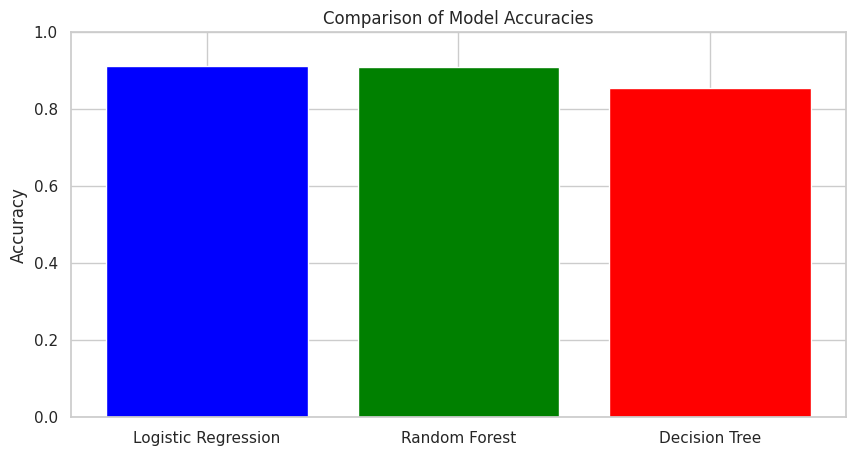

In [72]:
# Data for plotting
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [log_reg_accuracy, rf_accuracy, dt_accuracy]
roc_aucs = [log_reg_roc_auc, rf_roc_auc, dt_roc_auc]

# Creating bar plot for accuracies
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])  # Limit y-axis to show up to 100%
plt.show()

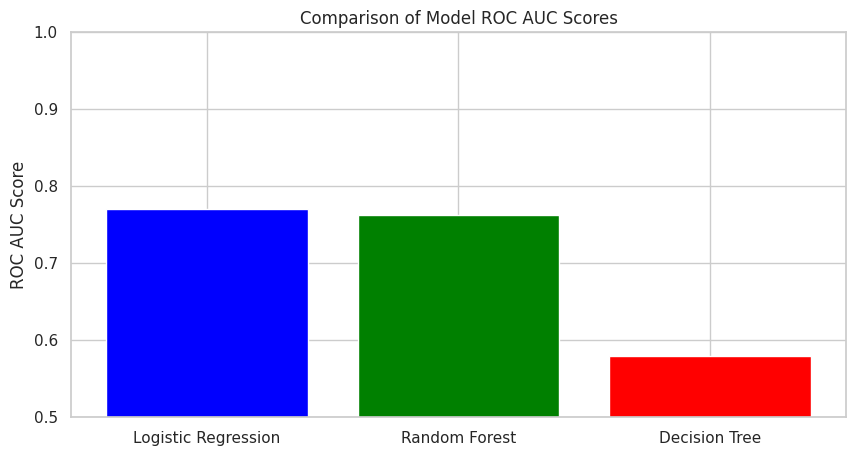

In [73]:
# Creating bar plot for ROC AUC scores
plt.figure(figsize=(10, 5))
plt.bar(models, roc_aucs, color=['blue', 'green', 'red'])
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Model ROC AUC Scores')
plt.ylim([0.5, 1])  # Limit y-axis to better highlight differences
plt.show()

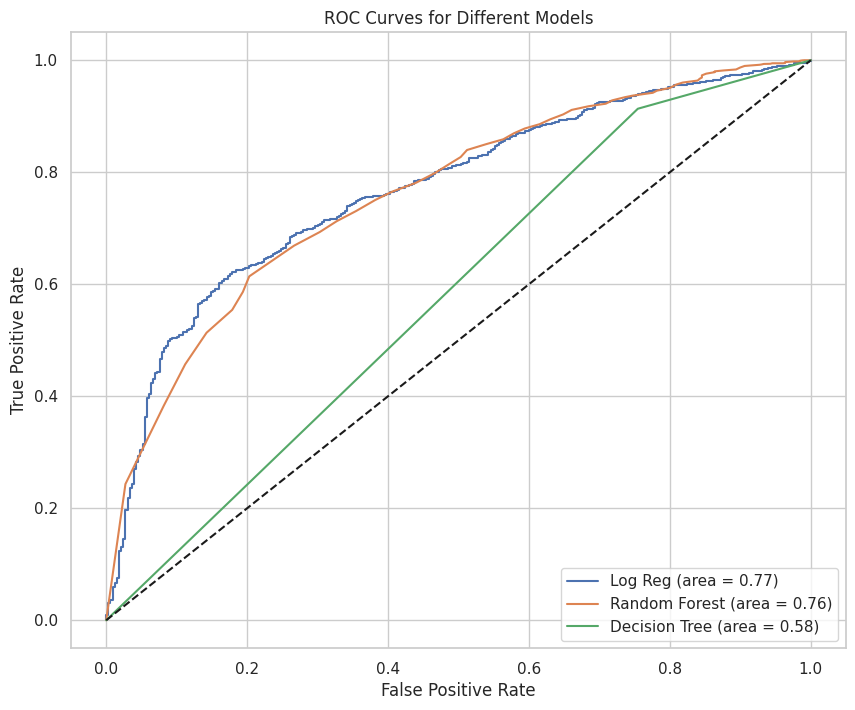

In [74]:
# ROC Curve plot
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Log Reg (area = {log_reg_roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {rf_roc_auc:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal dashed line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

# Hyper Tuning the Model and Checking the Cross Validation:

In [75]:
# Define parameter grids
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced number of trees
    'max_depth': [None, 10, 20],  # Including unbounded depth
    'min_samples_split': [2, 10]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]  # Different levels of regularization
}

# Define the parameter grid for the Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Different levels of tree depth
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10]  # Minimum number of samples required at a leaf node
}

# Setup the grid searches with cross-validation
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_lr, cv=3, scoring='accuracy')
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=3, scoring='accuracy')

# Execute the grid searches
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

Evaluating the Result:

In [76]:
# Best parameters and scores
rf_best_params = grid_search_rf.best_params_
rf_best_score = grid_search_rf.best_score_
lr_best_params = grid_search_lr.best_params_
lr_best_score = grid_search_lr.best_score_
dt_best_params = grid_search_dt.best_params_
dt_best_score = grid_search_dt.best_score_


print("Best Parameters for Random Forest:", rf_best_params)
print("Best Cross-validation Score for Random Forest:", rf_best_score)
print("Best Parameters for Logistic Regression:", lr_best_params)
print("Best Cross-validation Score for Logistic Regression:", lr_best_score)
print("Best Parameters for Decision Tree:", dt_best_params)
print("Best Cross-validation Score for Decision Tree:", dt_best_score)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-validation Score for Random Forest: 0.9071701609051418
Best Parameters for Logistic Regression: {'C': 0.01}
Best Cross-validation Score for Logistic Regression: 0.9064204010064255
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-validation Score for Decision Tree: 0.8985143197367228


- For Random Forest: The best parameters were max_depth of 20, min_samples_split of 10, and n_estimators of 100, yielding a cross-validation score of 0.907.
- For Logistic Regression: A regularization strength C of 0.01 was optimal, with a cross-validation score of 0.906.
- For the Decision Tree: A max_depth of 10, min_samples_leaf of 10, and min_samples_split of 2 was the best configuration, leading to a cross-validation score of 0.899.



# Ensemble Method:

In [77]:
# After finding the best parameters through grid search, initialize the models with these parameters
best_log_reg = LogisticRegression(max_iter=1000, **lr_best_params)
best_random_forest = RandomForestClassifier(**rf_best_params)
best_decision_tree = DecisionTreeClassifier(**dt_best_params)

# Create the ensemble model with voting, using the best parameters for each model
ensemble_model = VotingClassifier(estimators=[
    ('lr', best_log_reg),
    ('rf', best_random_forest),
    ('dt', best_decision_tree)
], voting='soft')  # 'soft' voting is used to predict the class label based on the argmax of the sums of the predicted probabilities

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions with the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate probabilities to compute ROC-AUC score
ensemble_probabilities = ensemble_model.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_probabilities)

# Print ensemble model metrics
print("Ensemble Model Accuracy:", ensemble_accuracy)
print("Ensemble Model ROC-AUC Score:", ensemble_roc_auc)


Ensemble Model Accuracy: 0.9108505997818975
Ensemble Model ROC-AUC Score: 0.791734299253772


In an effort to leverage the strengths of individual models, we applied an ensemble method which delivered an accuracy of 0.911 and an ROC-AUC score of 0.792. This approach effectively synthesized the individual models to achieve a balanced and robust predictive performance.

# Receiver Operating Characteristic (ROC) curve

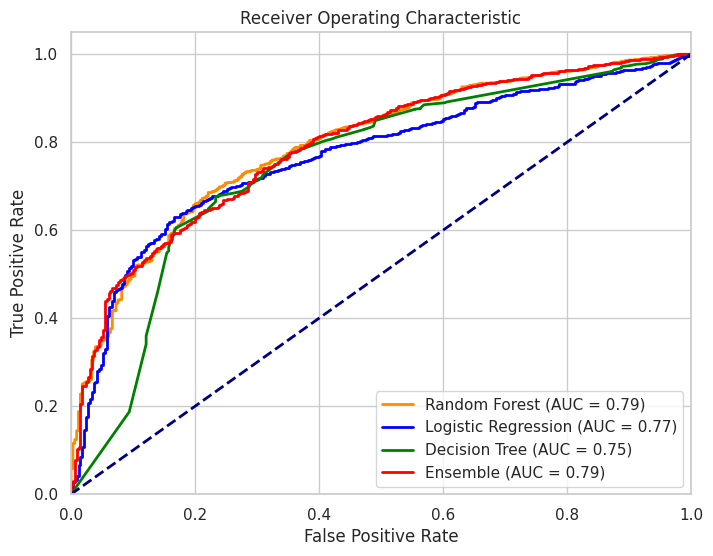

Random Forest Metrics: {'Accuracy': 0.9108505997818975, 'Precision': 0.9107776261937244, 'Recall': 1.0, 'ROC-AUC': 0.7943883109101803}
Logistic Regression Metrics: {'Accuracy': 0.9100327153762269, 'Precision': 0.9100327153762269, 'Recall': 1.0, 'ROC-AUC': 0.7686357281623908}
Decision Tree Metrics: {'Accuracy': 0.9007633587786259, 'Precision': 0.9135150166852057, 'Recall': 0.9841222288795686, 'ROC-AUC': 0.7493899449861104}
Ensemble Model Metrics: {'Accuracy': 0.9108505997818975, 'Precision': 0.911001911001911, 'Recall': 0.9997004194128221, 'ROC-AUC': 0.791734299253772}


In [78]:
# Retrain Random Forest with the best parameters
optimized_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2)
optimized_rf.fit(X_train, y_train)
rf_predictions = optimized_rf.predict(X_test)
rf_proba = optimized_rf.predict_proba(X_test)[:, 1]

# Retrain Logistic Regression with the best parameters
optimized_lr = LogisticRegression(C=0.01, max_iter=1000)
optimized_lr.fit(X_train, y_train)
lr_predictions = optimized_lr.predict(X_test)
lr_proba = optimized_lr.predict_proba(X_test)[:, 1]

# Retrain Decision Tree with the best parameters
optimized_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=5)
optimized_dt.fit(X_train, y_train)
dt_predictions = optimized_dt.predict(X_test)
dt_proba = optimized_dt.predict_proba(X_test)[:, 1]

ensemble_pred = ensemble_model.predict(X_test)
ensemble_proba = ensemble_model.predict_proba(X_test)[:, 1]

# Metrics calculation
metrics_rf = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions),
    'Recall': recall_score(y_test, rf_predictions),
    'ROC-AUC': roc_auc_score(y_test, rf_proba)
}

metrics_lr = {
    'Accuracy': accuracy_score(y_test, lr_predictions),
    'Precision': precision_score(y_test, lr_predictions),
    'Recall': recall_score(y_test, lr_predictions),
    'ROC-AUC': roc_auc_score(y_test, lr_proba)
}

metrics_dt = {
    'Accuracy': accuracy_score(y_test, dt_predictions),
    'Precision': precision_score(y_test, dt_predictions),
    'Recall': recall_score(y_test, dt_predictions),
    'ROC-AUC': roc_auc_score(y_test, dt_proba)
}

metrics_ensemble = {
    'Accuracy': accuracy_score(y_test, ensemble_pred),
    'Precision': precision_score(y_test, ensemble_pred),
    'Recall': recall_score(y_test, ensemble_pred),
    'ROC-AUC': roc_auc_score(y_test, ensemble_proba)
}


# ROC Curve Calculation
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_proba)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_proba)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plotting ROC Curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_ensemble, tpr_ensemble, color='red', lw=2, label='Ensemble (AUC = %0.2f)' % roc_auc_ensemble)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print metrics
print("Random Forest Metrics:", metrics_rf)
print("Logistic Regression Metrics:", metrics_lr)
print("Decision Tree Metrics:", metrics_dt)
print("Ensemble Model Metrics:", metrics_ensemble)

The ROC curve analysis of our predictive models for SBA loan approvals yielded insightful results. The Random Forest and Ensemble models achieved the highest Area Under the Curve (AUC) at 0.79, indicating strong discriminatory abilities in identifying loan outcomes. Logistic Regression was close behind with an AUC of 0.77. The Decision Tree model had an AUC of 0.75, the lowest among the models but still above random chance, displaying its utility despite being less accurate than the others. These results suggest the effectiveness of the Random Forest and Ensemble methods in the loan approval context, balancing accuracy with decision-making transparency.

# Precision-Recall curve

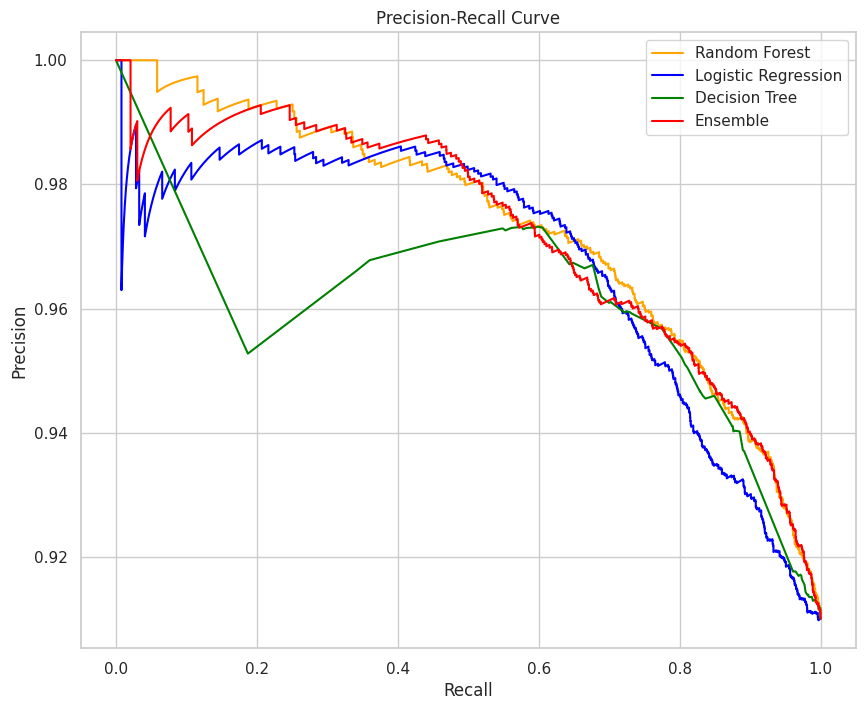

In [79]:


# Calculate precision and recall for each model
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_proba)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, lr_proba)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, dt_proba)
precision_ensemble, recall_ensemble, thresholds_ensemble = precision_recall_curve(y_test, ensemble_proba)

# Calculate the area under the precision-recall curve
auc_rf = auc(recall_rf, precision_rf)
auc_lr = auc(recall_lr, precision_lr)
auc_dt = auc(recall_dt, precision_dt)
auc_ensemble = auc(recall_ensemble, precision_ensemble)

# Plotting Precision-Recall curves for all models including the ensemble
plt.figure(figsize=(10, 8))
plt.plot(recall_rf, precision_rf, label=f'Random Forest', color='orange')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression', color='blue')
plt.plot(recall_dt, precision_dt, label=f'Decision Tree', color='green')
plt.plot(recall_ensemble, precision_ensemble, label=f'Ensemble', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

The Precision-Recall curve indicates that both the Random Forest and Ensemble models maintain high precision across various levels of recall, outperforming the Logistic Regression and Decision Tree models. The Logistic Regression model's precision declines more rapidly with increasing recall, and the Decision Tree shows volatility, suggesting less stability in its predictions. Overall, the Random Forest and Ensemble models demonstrate a balanced trade-off between precision and recall.

#Conclusion
To enhance the SBA's loan approval processes, we recommend integrating advanced machine learning models like Logistic Regression and Random Forest to improve accuracy and efficiency. Ongoing data monitoring and regular hyperparameter tuning should be implemented to keep the models effective as economic conditions change. Additionally, incorporating diverse data sources and developing user-friendly interfaces will enhance model robustness and decision-making clarity. Future research should explore deep learning, expand geographic data coverage, and develop real-time prediction capabilities to further support small businesses, vital for economic growth. By adopting these technologies, the SBA can streamline operations, reduce risks, and provide crucial support to viable businesses, ultimately transforming small business financing.